# CIOOS Atlantic Data Catalogue

CKAN https://docs.ckan.org/en/latest/api/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

CIOOS metadata is stored in a CKAN Data Catalogue. Complete documenation for CKAN is at https://docs.ckan.org for automated access, we want to focus on the API.  From the documentation: 
> CKAN’s Action API is a powerful, RPC-style API that exposes all of CKAN’s core features to API clients. All of a CKAN website’s core functionality (everything you can do with the web interface and more) can be used by external code that calls the CKAN API.

From a Python environment, there is a package called [ckanapi](https://github.com/ckan/ckanapi) that wraps this API.

In [2]:
import requests
from ckanapi import RemoteCKAN

In [3]:
s = requests.session()

s.auth = ('cioosatlantic', '4oceans')

prod_ckan_url = 'https://cioosatlantic.ca/ckan/'
dev_ckan_url = 'https://dev.cioosatlantic.ca/ckan/'

ckan_url = dev_ckan_url

ckan = RemoteCKAN(ckan_url, session=s)  # User Agent options available if needed

The API contains all the functionality for interacting with CKAN. For this tutorial, we focus only the API GET (those with `ckan.logic.action.get`) calls that can be used without administrator access.

## Site information

In [4]:
ckan.address

'https://dev.cioosatlantic.ca/ckan/'

Verify that the API can connect to a valid CKAN server.

In [5]:
ckan.action.site_read()

True

Get some information about the CKAN server.

In [6]:
ckan.action.status_show()

{'ckan_version': '2.8.3',
 'site_url': 'https://dev.cioosatlantic.ca',
 'site_description': '{"fr": "french text", "en": "english text"}',
 'site_title': '{"fr": "CKAN", "en": "CKAN"}',
 'error_emails_to': None,
 'locale_default': 'en',
 'extensions': ['stats',
  'text_view',
  'image_view',
  'recline_view',
  'datastore',
  'datapusher',
  'harvest',
  'ckan_harvester',
  'csw_harvester',
  'waf_harvester',
  'doc_harvester',
  'geonetwork_harvester',
  'ckan_schema_harvester',
  'ckan_spatial_harvester',
  'spatial_metadata',
  'spatial_query',
  'spatial_harvest_metadata_api',
  'googleanalyticsbasic',
  'cioos_theme',
  'cioos_harvest',
  'package_converter',
  'scheming_datasets',
  'scheming_organizations',
  'repeating',
  'composite',
  'fluent']}

We can see that the CIOOS Atlantic site is currently running version 2.8.3 and has a number of CKAN extensions installed.

## Packages

In CKAN, a specific dataset is called a *package*.  CKAN packages are uniquely identified by an identifier.  We can list the identifiers of all the available packages:

In [7]:
ckan.action.package_list(limit=10)

['0c789db6-ae46-4899-9d7e-eb151bf49fdd',
 '0fb1bc5e-0eb6-4dba-b494-0b80845b2030',
 '147423a6-b150-4cf5-9338-d9cbfb7452db',
 '2ed26c3c-d328-453d-86cb-eef7ab3f9c58',
 '354ef3d6-4d39-48e4-8adc-518fbb425752',
 '38882a03-33a7-45b9-b2bd-916268f1e073',
 '4bf9f57d-f7c1-4522-b7ec-82deafb0bb31',
 '61f4cc32-0833-406f-80da-b725418239f3',
 '65931687-684a-41b5-9aa5-086a9e72b5c5',
 '69423be3-f4e7-46d1-9bf3-b3135b88ef7c']

To search for packages that match a solr query string:

In [16]:
results = ckan.action.package_search(q="CMAR")

n = 0
package = results['results'][n]

print(f"Package {n+1} of {results['count']}:")
print()
print(f"package_id:\n {package['resources'][0]['package_id']}\n")

package = results['results'][n]
keys = ['title_translated', 'notes_translated', 
        'keywords', 'license_id', 
        'spatial', 'temporal-extent', 
        'state', 'progress']
for key in keys:

    if isinstance(package[key], dict) and 'en' in package[key]:
        value = package[key]['en']
    else:
        value = package[key]
    print(f"{key}:\n {value}\n")

print(f"url:\n {package['resources'][0]['url']}\n")

package_id = results['results'][n]['resources'][0]['package_id']

Package 1 of 3:

package_id:
 0bf09a36-9071-4492-beb8-9105ffc9f1d8

title_translated:
 CMAR - Jordan Bay

notes_translated:
 This dataset is collected using a 3 metre tall, 1 metre in diameter meteorological/oceanographic buoy built by Xeos Technologies Inc., of Dartmouth, Nova Scotia. The buoy is deployed in Jordan Bay, Nova Scotia near two finfish aquaculture leases. It measures wave data (Maximum Wave Height, Significant Wave Height, Peak Wave Period, Mean Wave Direction, and Mean Wave Spread) using a Brizo wave sensor manufactured by Xeos, and sea temperature using a Sea Temp sensor. The data is streamed to CIOOS every 30 minutes. The data will be used to validate an exposure model for the coast of Nova Scotia, which will be used to support informed decision making for existing and future finfish aquaculture sites.

keywords:
 ['seaState', 'seaSurfaceHeight', 'subSurfaceTemperature', 'sea_surface_wave_significant_height', 'sea_surface_wave_maximum_period', 'sea_surface_wave_maximum

We can also look up the details of a package directly using the package id:

In [24]:
n=2
package_id = results['results'][n]['id']
package_id

'183d1d6d-97f1-4461-b727-1731354192ea'

In [25]:
package = ckan.action.package_show(id=package_id)

print(f"package_id:\n {package['resources'][0]['package_id']}\n")
keys = ['title_translated', 'spatial', 'temporal-extent', ]
for key in keys:

    if isinstance(package[key], dict) and 'en' in package[key]:
        value = package[key]['en']
    else:
        value = package[key]
    print(f"{key}:\n {value}\n")

package_id:
 183d1d6d-97f1-4461-b727-1731354192ea

title_translated:
 Xeos Buoy - 002

spatial:
 {"type": "Polygon", "coordinates": [[[-66.205171, 44.310022], [-66.202573, 44.310022], [-66.202573, 44.30759], [-66.205171, 44.30759]]]}

temporal-extent:
 {"begin": "2020-07-16", "end": "2020-08-19"}



There are other metadata keys in a package that may be of interest.

In [26]:
package.keys()

dict_keys(['notes_translated', 'bbox-east-long', 'license_title', 'maintainer', 'author', 'relationships_as_object', 'unique-resource-identifier-full', 'resource-type', 'bbox-north-lat', 'private', 'maintainer_email', 'num_tags', 'xml_location_url', 'keywords', 'id', 'metadata_created', 'title_translated', 'cited-responsible-party', 'metadata_modified', 'metadata-language', 'author_email', 'metadata-point-of-contact', 'state', 'spatial', 'progress', 'type', 'resources', 'eov', 'creator_user_id', 'num_resources', 'maintenance-note', 'tags', 'bbox-west-long', 'dataset-reference-date', 'frequency-of-update', 'groups', 'license_id', 'relationships_as_subject', 'temporal-extent', 'organization', 'name', 'isopen', 'url', 'notes', 'owner_org', 'extras', 'bbox-south-lat', 'title', 'revision_id', 'vertical-extent'])

We could also make Pandas dataframe of many packages.

In [32]:
package_list = ckan.action.package_list()

packages = [ckan.action.package_show(id=id) for id in package_list]
packages = pd.DataFrame(packages).set_index('id')

In [29]:
# Remove CIOOS Atlantic WAF, id='655942b6-a2ea-46da-a52b-8aea5a786b9b'
#packages = packages.drop(index='655942b6-a2ea-46da-a52b-8aea5a786b9b')

In [31]:
packages.loc[:,('title','state', 'progress')].head()

,title,state,progress
id,,,
9b79cbc3-0f84-4164-9b08-c2952872ad3d,Placentia Bay: North Harbour - NHARB,active,onGoing
dd3d14f5-f673-4aa2-a309-a699c95347a2,Halifax (Herring Cove) Buoy,active,onGoing
50e249f7-44e3-41dc-ab73-0daad146f990,"NEGL, Rigolet, Nunatsiavut (NLQU0002)",active,onGoing
cfb86dac-7be8-4fb6-9f93-dd5e0d37176b,Manolis Buoy,active,onGoing
fcf867b6-e8ee-44a1-8d6e-00b7f4c8eb28,Channel-Port Aux Basques Buoy,active,onGoing


## Tags

CKAN supported free form *tags* to help with data discovery. 

In [33]:
tags = ckan.action.tag_list()

tag_words = []
for tag in tags:
    tag = tag.lower()
    
    if '_' in tag:
        tag_parts = tag.split('_')
    else:
        tag_parts = tag.split(' ')
    tag_words += tag_parts

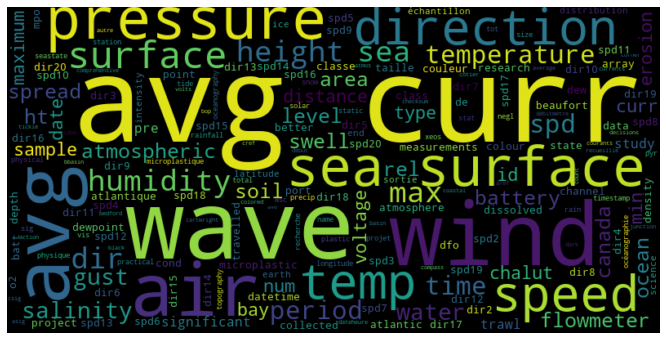

In [36]:
# Generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(tag_words))

wordcloud = WordCloud(width=800, height=400).generate(' '.join(tag_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('tag_cloud.png')
plt.show()

## Organizations

In [37]:
organizations = ckan.action.organization_list(all_fields=True)
organizations = pd.DataFrame(organizations).set_index('id')
organizations

,display_name,description,image_display_url,package_count,created,name,is_organization,state,image_url,type,title,revision_id,num_followers,approval_status
id,,,,,,,,,,,,,,
19f07604-2942-4ec7-aa9d-1c8ba810b3fc,smartatlantic,,,16,2020-02-03T16:45:23.553777,smartatlantic,True,active,,organization,,05019291-2e98-4ec4-a9c0-c2bfddd13e8e,0,approved
874a9890-61ce-463e-9a12-30353c2f6479,fisheries-and-oceans-canada,,,3,2020-04-07T16:00:50.444451,fisheries-and-oceans-canada,True,active,,organization,,b562ff3a-c02b-4108-895e-1008d48c47e6,0,approved
bdfd2d79-a8fb-4f8a-a9b5-e1684afb874d,ceotr,,,1,2020-04-07T16:02:17.529317,ceotr,True,active,,organization,,20962d44-bc44-448b-a3a0-d2650db3ffe9,0,approved
81a20ea0-ccfa-4406-a64c-5d945f4c01bd,coastal-action,,,1,2020-07-31T13:28:07.767172,coastal-action,True,active,,organization,,9ab036ad-25ee-4bce-8702-437330368375,0,approved
7b54eccd-50dc-44f0-8c62-d8976c9aabfc,cmar,,,3,2020-08-18T11:40:15.211022,cmar,True,active,,organization,,bb6322e5-5eea-4d54-b6e1-5f9a2c9023dc,0,approved
bb80ce3d-f259-4373-afb1-c775b4ad51d6,COVE,,,7,2020-06-19T10:12:27.217748,cove,True,active,,organization,COVE,e6ead4ef-e86e-4381-bb52-04e539870c26,0,approved
6cf7b236-a8cc-431a-9241-2e1b36daf095,NEGL at Queen's University,,,6,2020-06-19T10:51:47.559807,negl-at-queen-s-university,True,active,,organization,NEGL at Queen's University,64295b79-acb9-41ab-a3a0-87bc02908b29,0,approved
8139c79b-8766-4457-bf8a-19d327785542,XEOS,,,1,2020-06-19T10:52:01.516159,xeos,True,active,,organization,XEOS,9042552a-21de-433f-b9f1-5e1936cd0b39,0,approved


In [38]:
users = ckan.action.user_list()
users_df = pd.DataFrame(users).set_index('id')
users_df

,email_hash,about,display_name,name,created,sysadmin,activity_streams_email_notifications,state,number_of_edits,fullname,number_created_packages
id,,,,,,,,,,,
e4620972-6103-48df-b496-966b043b295c,d41d8cd98f00b204e9800998ecf8427e,None,default,default,2020-02-03T12:51:00.301891,True,False,active,307,None,38
2ab437b5-129b-4a4a-ac9f-7de8df3e13e5,af9f73e8b5443986572f1ffe7f1046c3,None,Jeff Cullis,jcullis,2019-11-26T12:31:24.409584,True,False,active,17,Jeff Cullis,0
8112391b-848b-4848-83ae-0c6bdbf5a2e4,b53baa675f1abe0b3f1de8701c4a2a46,None,jthomp,jthomp,2020-02-03T12:52:45.345976,True,False,active,22,None,1
77224b8d-bffa-478c-963a-1893c7df2f54,4503919a6b983e44fc16e6b279cff95e,,Odum Idika,oidika,2019-11-29T11:05:13.643623,True,False,active,0,Odum Idika,0
f997956e-4417-4c4f-a21c-c01335aa9eec,7e32bc12b8dbbacb514f11bafe69bc65,None,Scott Bruce,scottbruce,2019-11-26T12:31:24.409584,True,False,active,15,Scott Bruce,1
